# Differential expression and gene ontolgies of immune integrated SEACells: Ascites

In [1]:
import os
import logging
import shutil

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import colors
from matplotlib import rcParams

In [4]:
from gprofiler import GProfiler

In [5]:
sc.logging.print_versions()

-----
anndata     0.9.2
scanpy      1.9.2
-----
PIL                 10.0.0
anyio               NA
asttokens           NA
attr                23.1.0
babel               2.12.1
backcall            0.2.0
brotli              1.0.9
certifi             2023.07.22
cffi                1.15.0
charset_normalizer  3.2.0
comm                0.1.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml          0.7.1
exceptiongroup      1.1.3
executing           1.2.0
fastjsonschema      NA
gprofiler           1.0.0
h5py                3.9.0
idna                3.4
igraph              0.10.6
importlib_resources NA
ipykernel           6.25.0
ipywidgets          8.1.0
jedi                0.19.0
jinja2              3.1.2
joblib              1.3.2
json5               NA
jsonschema          4.17.3
jupyter_events      0.6.3
jupyter_server      2.7.3
jupyterlab_server   2.24.0
kiwisolver          1.4.5
leidenalg           0

In [6]:
pwd

'/home/marta.sallese/ov_cancer_atlas/atlas_project/script/downstream/clustering/immune'

In [7]:
import sys
sys.path.insert(1, '/home/marta.sallese/ov_cancer_atlas/atlas_project/script/downstream/clustering/cancer')

In [8]:
from plotting_bubble import scale_data_5_75, plot_enrich 

In [10]:
adata = sc.read('/group/testa/Project/OvarianAtlas/Integrated_data_hdg_new/seacells_immune_hdg_patients_batch_corr_scgen_celltypes.h5ad')
# adata = sc.read('/group/testa/Project/OvarianAtlas/atlas_project/raw_data/integration/metacells/seacells_immune_hdg_patients_batch_corr_scgen_tissuetreat.h5ad')

In [11]:
adata

AnnData object with n_obs × n_vars = 15397 × 17054
    obs: 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'SEACell', '# Single Cells', 'tissue-treatment', 'Plasma_cells', 'T_cells', 'Mast_cells', 'B_cells', 'Myeloid_cells', 'Dendritic_cells', 'cell_types', '_scvi_batch', '_scvi_labels'
    uns: '_scvi_manager_uuid', '_scvi_uuid'
    obsm: 'corrected_latent', 'latent'

In [12]:
adata.obs = adata.obs.drop(columns=['_scvi_batch', '_scvi_labels'])

In [13]:
hvg = pd.read_csv('/home/marta.sallese/ov_cancer_atlas/Atlas_scripts/HDG_new/Tables/atlas_hdg_common_dispersion_patients_immune.csv',  index_col=0)
# hvg = pd.read_csv('/home/marta.sallese/ov_cancer_atlas/atlas_project/script/hdg/immune/atlas_immune_hdg_dispersion_patients.csv',  index_col=0)

In [14]:
hvg[hvg.highly_variable]

,highly_variable
FAM87B,True
FAM41C,True
SAMD11,True
HES4,True
ISG15,True
...,...
MT-CO3,True
MT-ND3,True
MT-ND4L,True
MT-ND4,True


In [15]:
hvg.highly_variable.sum()

5088

In [16]:
adata.var

""
FAM87B
LINC00115
FAM41C
SAMD11
NOC2L
...
MT-ND4L
MT-ND4
MT-ND5
MT-ND6


In [17]:
adata.var['highly_variable']=hvg.highly_variable

In [18]:
adata.var

,highly_variable
FAM87B,True
LINC00115,False
FAM41C,True
SAMD11,True
NOC2L,False
...,...
MT-ND4L,True
MT-ND4,True
MT-ND5,False
MT-ND6,False


In [19]:
adata.var.highly_variable = adata.var.highly_variable.fillna(False)

In [20]:
adata.var

,highly_variable
FAM87B,True
LINC00115,False
FAM41C,True
SAMD11,True
NOC2L,False
...,...
MT-ND4L,True
MT-ND4,True
MT-ND5,False
MT-ND6,False


In [21]:
# you can skip this passage if you specify use_highly_variable = True when computing embeddings
# adata.raw = adata
# adata = adata[:, adata.var.highly_variable]

In [21]:
adata.var_names

Index(['FAM87B', 'LINC00115', 'FAM41C', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1',
       'HES4', 'ISG15', 'AGRN',
       ...
       'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4',
       'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object', length=17054)

In [22]:
cell_cycle_genes = [x.strip() for x in open('/home/marta.sallese/ov_cancer_atlas/regev_lab_cell_cycle_genes.txt')]

s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [23]:
adata.obs

,tissue,developmental_stage,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,dataset,SEACell,# Single Cells,...,Plasma_cells,T_cells,Mast_cells,B_cells,Myeloid_cells,Dendritic_cells,cell_types,S_score,G2M_score,phase
SEACell_patient_tissue,,,,,,,,,,,,,,,,,,,,,
SEACell-13_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-13,41,...,-78.401033,-24.337083,-2.897418,-4.237393,772.771689,11.807855,Myeloid_cells,-0.520432,-0.686675,G1
SEACell-11_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-11,69,...,-107.718991,605.598261,-5.765618,-7.199352,13.612588,-13.186640,T_cells,-0.144975,-0.185161,G1
SEACell-28_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-28,82,...,-143.938650,364.718452,-6.810801,-11.440978,20.779935,-29.721841,T_cells,-0.124972,-0.210522,G1
SEACell-40_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-40,77,...,-95.485831,180.159196,-7.766685,-7.351844,1.040896,-9.014676,T_cells,-0.154846,-0.263840,G1
SEACell-43_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-43,87,...,-137.830673,637.682935,-10.489032,-9.638959,17.276179,-27.927430,T_cells,-0.073178,-0.107548,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEACell-80_Vasquez_118_Metastasis,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,Vasquez,SEACell-80,8,...,-16.191664,74.186012,-0.501856,-1.560740,-3.946893,1.028906,T_cells,-0.054939,-0.114111,G1
SEACell-148_Vasquez_118_Metastasis,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,Vasquez,SEACell-148,1,...,-2.149969,6.573266,-0.090631,-0.246718,-0.431966,-0.734470,T_cells,0.006868,0.015299,G2M
SEACell-75_Vasquez_118_Metastasis,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,Vasquez,SEACell-75,2,...,-2.410867,-2.271696,-0.269817,-0.510279,35.198731,-0.577510,Myeloid_cells,-0.056342,-0.112828,G1


In [24]:
# Macrophages M1 cells markers
sc.tl.score_genes(adata, ['S100A9','S100A8','VCAN','FCN1','S100A12','THBS1','LYZ','CD55','RETN','CD52','EREG','AC020656.1','CD300E','APOBEC3A','AREG','CFP','SMIM25',
                          'MCEMP1','S100A4','RIPOR2','CD36','S100A6','CYP1B1','SERPINA1','STXBP2','LST1','LILRA5','SLC25A37','FPR1','MNDA','LILRB2','TIMP1','FGR',
                          'NAMPT','COTL1','IRAK3','LYST','SH3BGRL3','NCF2','CCR2','FLNA','MXD1','LTA4H','RGS2','TUBA1A','H3F3A','CEBPB','CSF3R','CSTA','LCP1'], 
score_name = "M1_macrophages", use_raw=False)

# T CD4 naive cells markers
sc.tl.score_genes(adata, ['IL7R','CCR7','KLF2','EEF1B2','TPT1','EEF1A1','TCF7','MAL','CD40LG','GPR183','LDHB','SELL','SNHG8','NOSIP','PABPC1','NOP53','LEF1',
                          'LTB','EIF3E','RACK1','JUNB','NACA','SOCS3','TOMM7','UBA52','TMEM123','SERINC5','EEF2','FXYD5','TRABD2A','TSHZ2','SARAF','AQP3',
                          'ANK3','RIPOR2','AP3M2','TOB1','ZFAS1','LINC02273','EIF4B','ANXA1','NSA2','TNFRSF25','CTSL','SESN3','EEF1D','FAU','LDLRAP1','FLT3LG','TIMP1'], 
score_name = "T_CD4_naive", use_raw=False)

# T CD4 CXCL13 markers
sc.tl.score_genes(adata, ['CXCL13','NMB','NR3C1','FKBP5','IL6ST','MAF','ITM2A','CTLA4','TSHZ2','LIMS1','CD40LG','PDCD1','TNFRSF4','CD4','RNF19A','RBPJ','CORO1B','CPM',
                          'ZBED2','AHI1','ICA1','TOX2','DUSP4','AC004585.1','ARID5B','CCDC50','CD84','IGFL2','SRGN','BATF','CH25H','TNFRSF18','SPOCK2','CHN1','CD200',
                          'RGS1','RILPL2','ZNRF1','TNFRSF25','METTL8','SLA','SMCO4','BTLA','SESN3','NAP1L4','BHLHE40-AS1','MIR155HG','BIRC3','PTPN13','CYSLTR1'], 
score_name = "T_CD4_CXCL13", use_raw=False)

# T CD4 reg markers
sc.tl.score_genes(adata, ['TNFRSF4','IL2RA','FOXP3','CTLA4','LTB','RTKN2','BATF','TNFRSF18','SAT1','TBC1D4','TIGIT','GADD45A','TNFRSF1B','PMAIP1','UGP2','IKZF2','TNFRSF9',
                          'ICOS','SOX4','LINC01943','IL32','ARID5B','LAYN','CD27','BIRC3','CORO1B','TYMP','CD4','DUSP4','ENTPD1','CTSC','MIR4435-2HG','LINC02099','MAGEH1',
                          'SPOCK2','CARD16','PHACTR2','S100A4','STAM','SPATS2L','GLRX','AC005224.3','MAF','BTG3','PBXIP1','F5','SLAMF1','IL1R1','DNPH1','TRAC'], 
score_name = "T_CD4_reg", use_raw=False)

# T CD8 cytotoxic markers
sc.tl.score_genes(adata, ['GZMK','CD8A','CD8B','ITM2C','GZMH','CCL5','TRGC2','GZMA','KLRG1','CCL4','CRTAM','CST7','GZMM','DTHD1','HLA-DPB1','PPP1R14B','CD3G','THEMIS','EOMES',
                          'TC2N','DUSP2','LYAR','CD3D','PPP2R5C','SLF1','KIAA1551','CXCR6','YBX3','HLA-DPA1','CCL4L2','F2R','CXCR4','FAM102A','HLA-DRB1','SLAMF7','APOBEC3G',
                          'SH2D1A','CD84','STK17A','CCR5','TUBA4A','ARAP2','GPR174','PECAM1'], 
score_name = "T_CD8_cytotoxic", use_raw=False)

# T CD8 CXCL13 markers
sc.tl.score_genes(adata, ['CXCL13','GZMB','CCL4L2','MIR155HG','TNFRSF9','HAVCR2','RBPJ','LAG3','IFNG','PTMS','CCL3','CD8A','CRTAM','FABP5','PHLDA1','JAML','TIGIT','KRT86',
                          'CCL5','CXCR6','LINC01871','PDCD1','HLA-DRB1','TNIP3','GAPDH','CD63','FAM3C','GZMH','CTLA4','CCND2','SPRY1','CD8B','VCAM1','HLA-DRA','ID2','ITGAE',
                          'DUSP4','LYST','ENTPD1','SRGAP3','TNFSF4','NDFIP2','GOLIM4','AKAP5','CD27','HLA-DPA1','SNAP47','RGS1','ITM2A','APOBEC3C'], 
score_name = "T_CD8_CXCL13", use_raw=False)

# T CD8 ISG markers
sc.tl.score_genes(adata, ['IFIT3','ISG15','IFIT1','MX1','IFIT2','RSAD2','IFI6','MX2','ISG20','IFI44L','HERC5','OAS1','SAMD9L','TNFSF10','STAT1','EIF2AK2','GBP1','MT2A','OAS3',
                          'EPSTI1','SAMD9','PLSCR1','IFI35','XAF1','OASL','IFI44','USP18','LY6E','CMPK2','NT5C3A','DDX58','HELZ2','IRF7','TRIM22','PARP14','DDX60','LAG3',
                          'DDX60L','IFIH1','PPM1K','OAS2','RNF213','PARP9','PNPT1','SP110','SAT1','C19orf66','STAT2','BST2','LAP3'], 
score_name = "T_CD8_ISG", use_raw=False)

# Innate lymphoid cells markers
sc.tl.score_genes(adata, ['KLRB1','IL7R','IL4I1','CEBPD','LST1','TNFSF13B','LTB','FOS','SLC4A10''CCR6','NFKBIA','RORA','NCR3','TNFAIP3','AQP3','MYBL1','DUSP1','LINC01871','CCL20',
                          'JAML','CTSH','TMIGD2','TNFRSF25','ERN1','DPP4','KLRG1','SPOCK2','ZBTB16','IFNGR1','FKBP11','TPT1','MGAT4A','PDCD4','S100A4','SATB1','S100A6','CD40LG',
                          'B3GALT2','ABCB1','RUNX2','TLE1','EEF1A1','CERK','RORC','PERP','LTK','PLCB1','LTC4S','EEF1B2','KIF5C'], 
score_name = "ILC", use_raw=False)

# NK CD56 cells markers
sc.tl.score_genes(adata, ['GNLY','TYROBP','AREG','KLRC1','FCER1G','TRDC','KRT81','XCL1','KLRD1','IGFBP2','XCL2','CLIC3','KRT86','IL2RB','CEBPD','CTSW','TXK','MATK','KLRB1',
                          'CD7','CD63','NKG7','CCL3','TMIGD2','HOPX','TNFRSF18','CMC1','GSTP1','SRGAP3','KLRC2','LAT2','GZMB','LINC00996','NCAM1','PRF1','CXXC5','IFITM3',
                          'ZNF683','KLRF1','MCTP2','SH2D1B','ITGA1','IFITM2','CCL5','CD38','SLC16A3','ITGAX','CAPN12','CD247','SAMD3'], 
score_name = "NK_CD56", use_raw=False)

# NK cytotoxic cells markers
sc.tl.score_genes(adata, ['FGFBP2','FCGR3A','SPON2','PRF1','KLRF1','GNLY','KLRD1','NKG7','CX3CR1','GZMB','PLAC8','CLIC3','PLEK','TYROBP','PTGDS','EFHD2','FCER1G','CST7','GZMH',
                          'ADGRG1','CCL3','HOPX','ZEB2','IGFBP7','PRSS23','CD247','AKR1C3','C1orf21','MYBL1','AREG','S1PR5','CTSW','KLF2','ABHD17A','TTC38','PTPN12','KLRB1','CCL4',
                          'PTGDR','TRDC','ITGB2','XBP1','CEP78','CMC1','LITAF','BIN2','CHST2','CD300A','ARL4C','TXK'], 
score_name = "NK_cytotoxic", use_raw=False)


/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [25]:
adata.obs['cell_types'] = adata.obs[['Plasma_cells','Mast_cells', 'B_cells', 'M1_macrophages', 'Myeloid_cells', 'Dendritic_cells',
                                                    'T_CD4_naive', 'T_CD4_CXCL13', 'T_CD4_reg', 'T_CD8_cytotoxic', 'T_CD8_CXCL13', 'T_CD8_ISG',
                                                    'ILC', 'NK_CD56', 'NK_cytotoxic']].idxmax(axis=1)

### Ascites

In [26]:
adata_as = adata[(adata.obs['tissue'] == 'Ascites')]

In [27]:
adata_as

View of AnnData object with n_obs × n_vars = 2341 × 17054
    obs: 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'SEACell', '# Single Cells', 'tissue-treatment', 'Plasma_cells', 'T_cells', 'Mast_cells', 'B_cells', 'Myeloid_cells', 'Dendritic_cells', 'cell_types', 'S_score', 'G2M_score', 'phase', 'M1_macrophages', 'T_CD4_naive', 'T_CD4_CXCL13', 'T_CD4_reg', 'T_CD8_cytotoxic', 'T_CD8_CXCL13', 'T_CD8_ISG', 'ILC', 'NK_CD56', 'NK_cytotoxic'
    var: 'highly_variable'
    uns: '_scvi_manager_uuid', '_scvi_uuid'
    obsm: 'corrected_latent', 'latent'

In [28]:
sc.tl.pca(adata_as, use_highly_variable = True)

In [29]:
sc.pp.neighbors(adata_as, n_neighbors=10, n_pcs=50)
sc.tl.umap(adata_as)

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/marta.sallese/miniconda3/envs/gprofiler/lib/

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


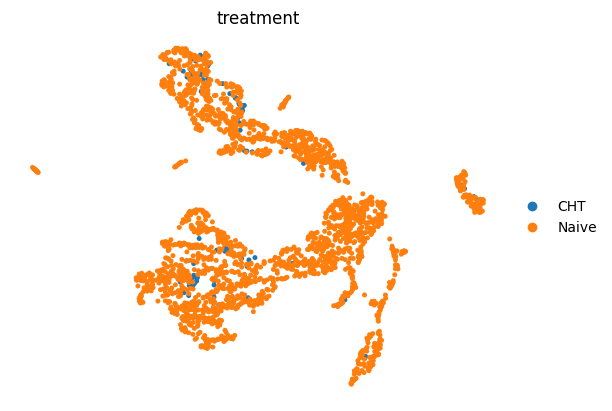

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


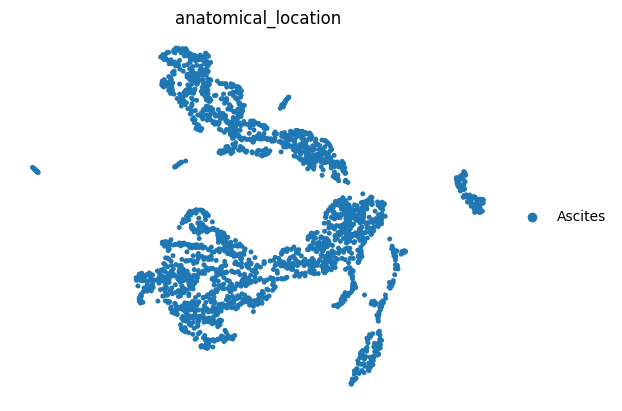

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


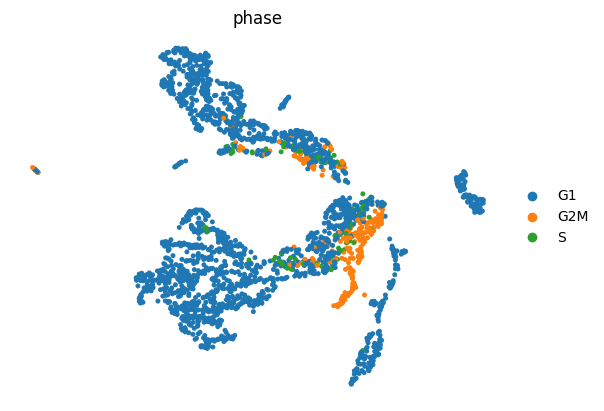

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


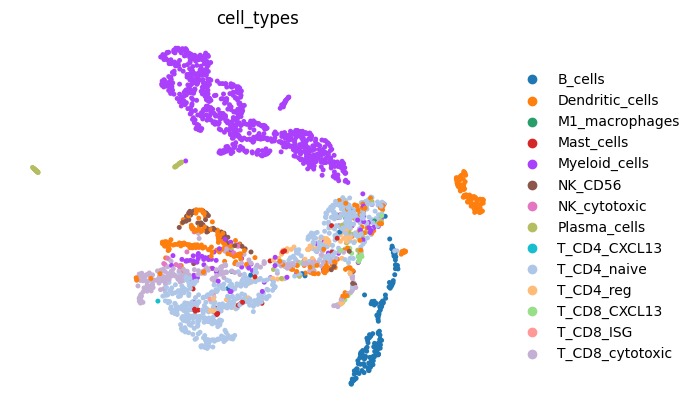

In [30]:
sc.pl.umap(adata_as, color=["treatment"], frameon=False)
sc.pl.umap(adata_as, color=["anatomical_location"], frameon=False)
sc.pl.umap(adata_as, color=["phase"], frameon=False)
sc.pl.umap(adata_as, color=["cell_types"], frameon=False)

In [31]:
leidenTotal=[]
for i in np.arange(0.01, 2.0, 0.1):
    sc.tl.leiden(adata_as,resolution = i,key_added="leiden-{}".format(round(i,2)))
    leidenTotal.append("leiden-{}".format(round(i,2)))

In [32]:
leidenTotal

['leiden-0.01',
 'leiden-0.11',
 'leiden-0.21',
 'leiden-0.31',
 'leiden-0.41',
 'leiden-0.51',
 'leiden-0.61',
 'leiden-0.71',
 'leiden-0.81',
 'leiden-0.91',
 'leiden-1.01',
 'leiden-1.11',
 'leiden-1.21',
 'leiden-1.31',
 'leiden-1.41',
 'leiden-1.51',
 'leiden-1.61',
 'leiden-1.71',
 'leiden-1.81',
 'leiden-1.91']

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


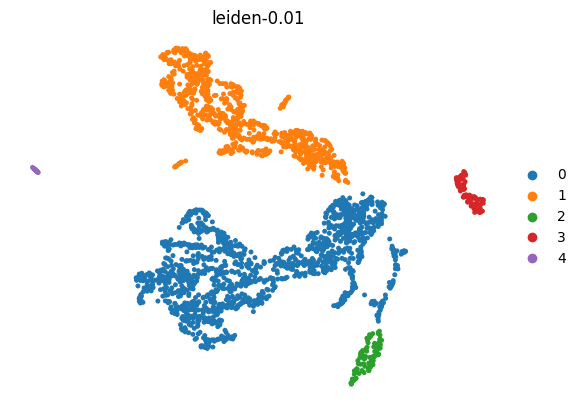

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


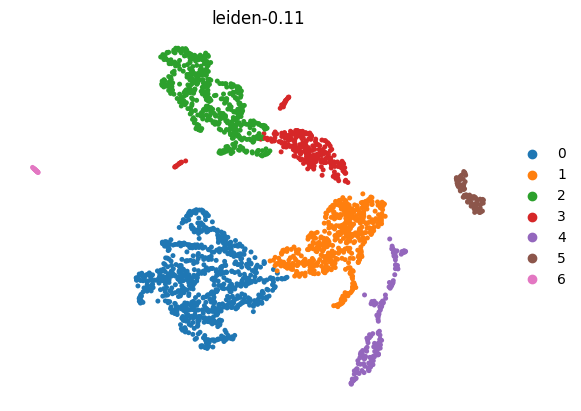

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


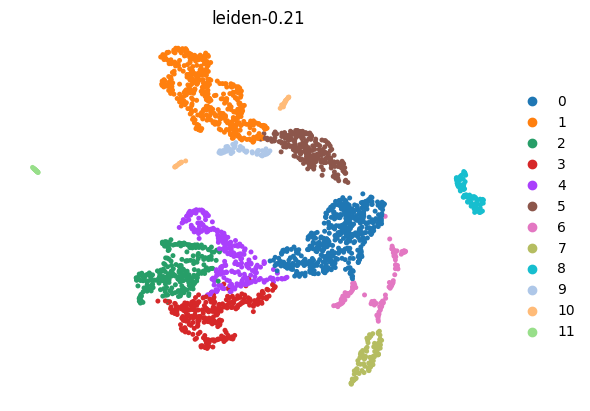

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


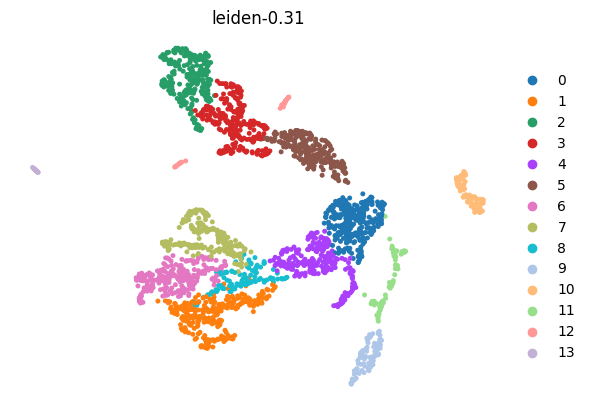

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


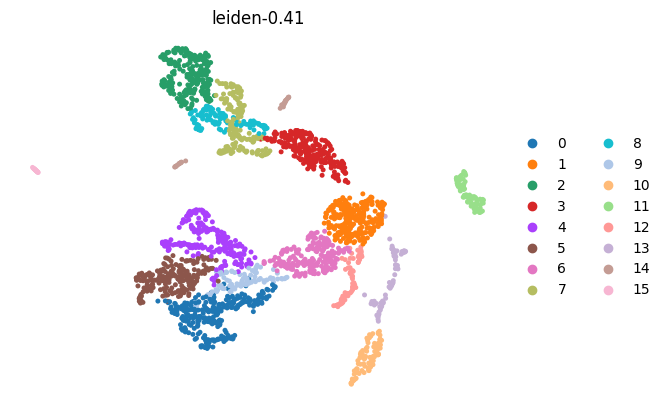

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


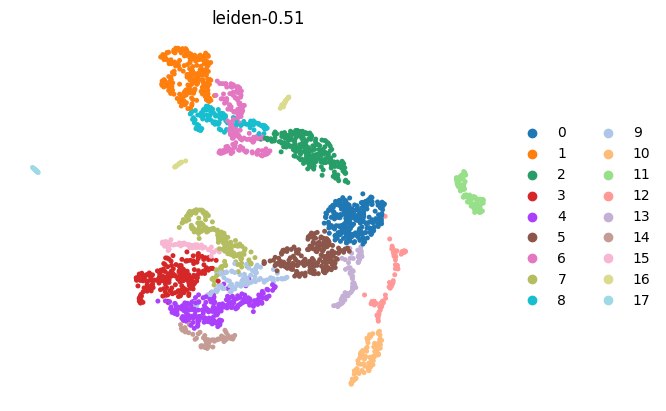

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


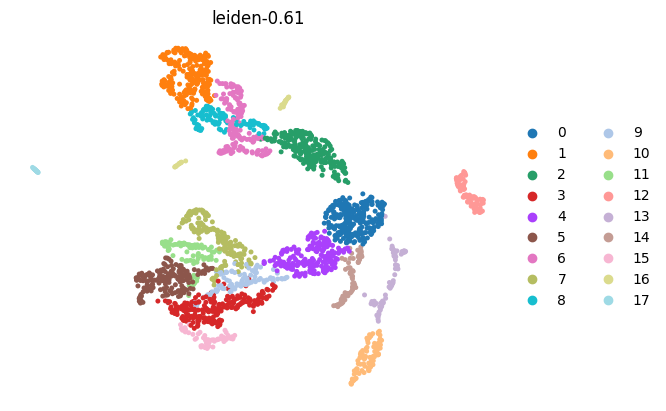

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


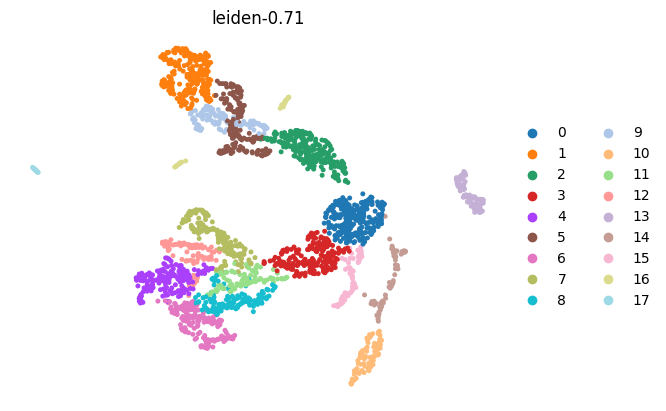

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


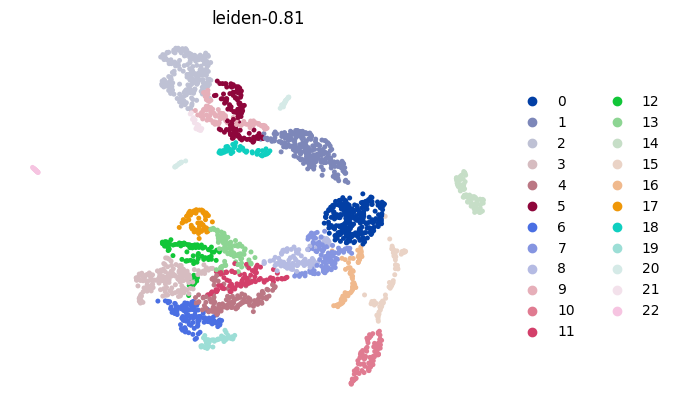

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


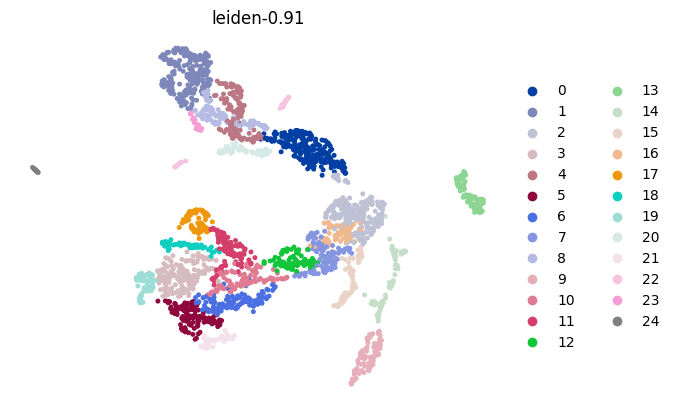

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


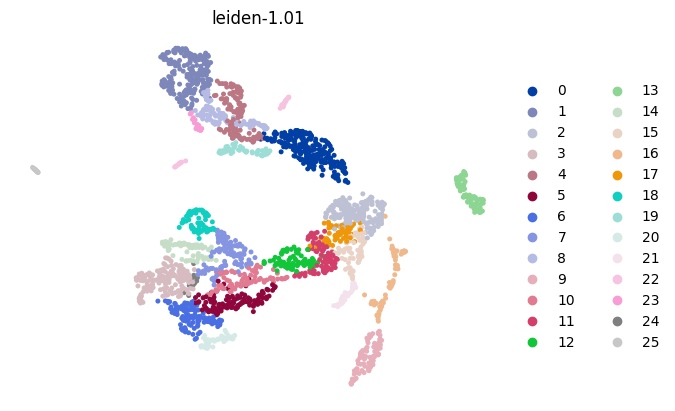

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


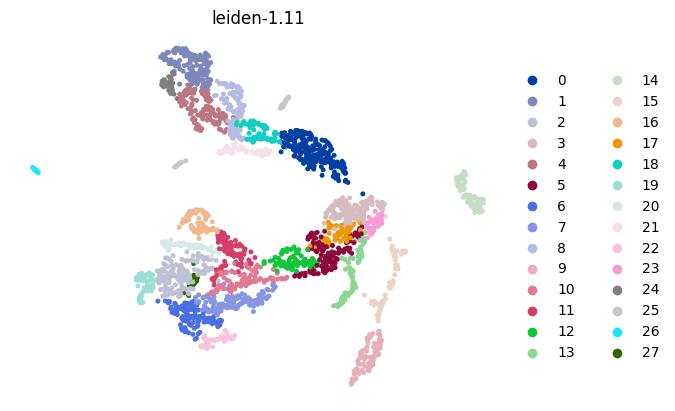

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


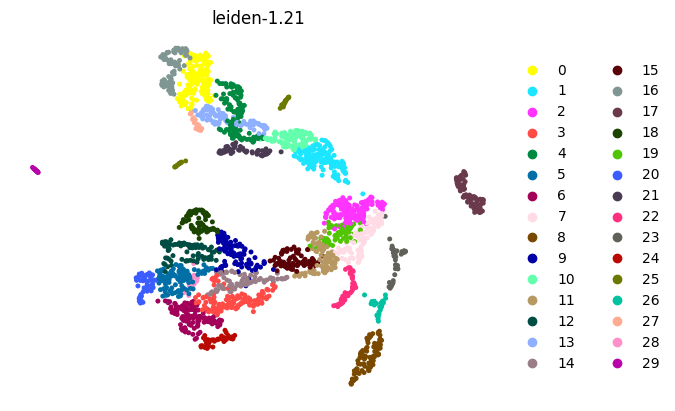

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


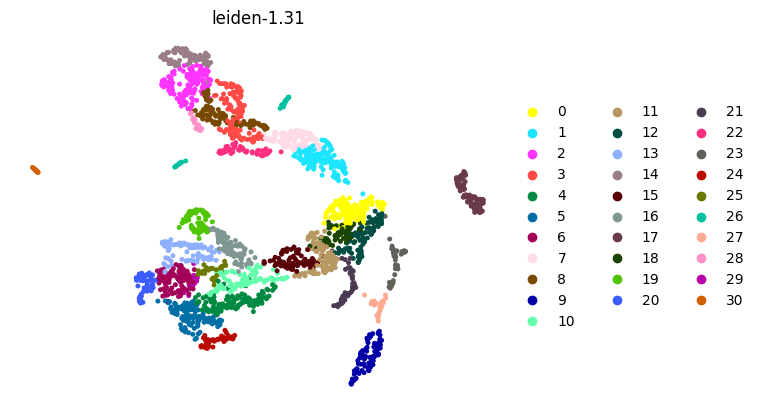

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


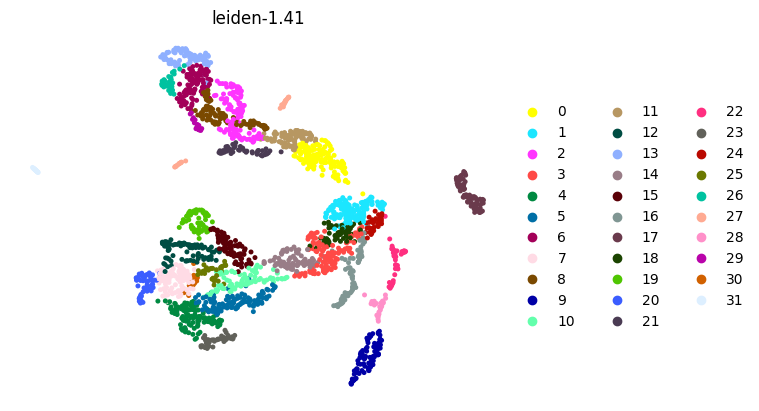

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


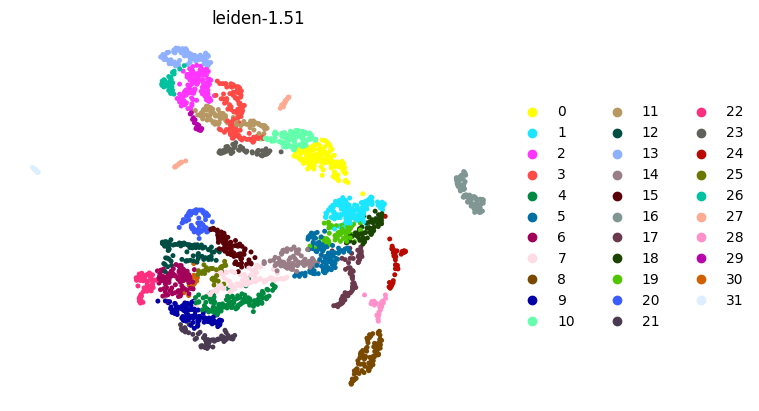

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


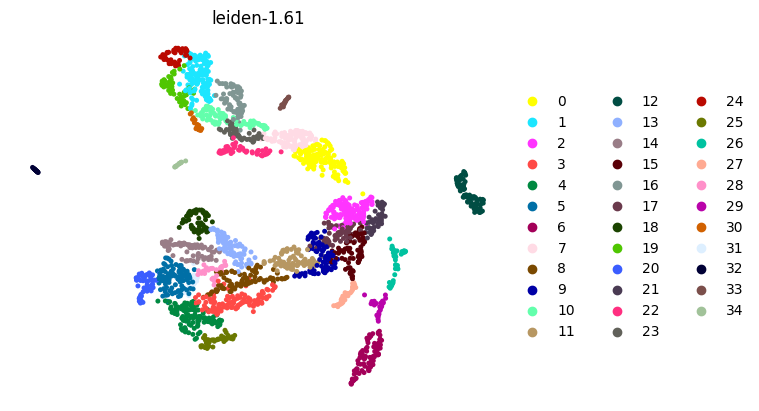

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


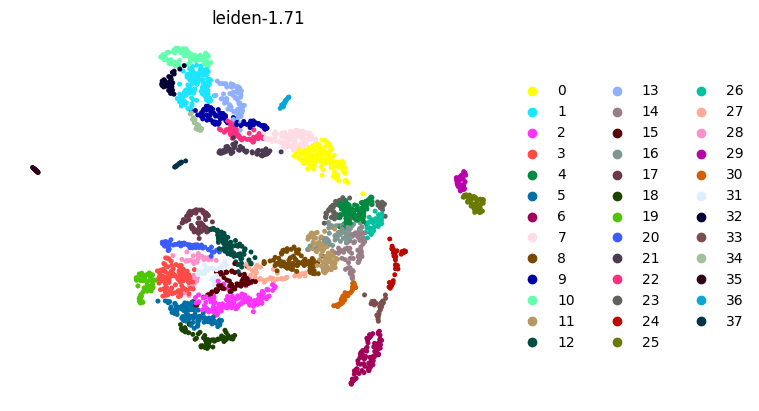

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


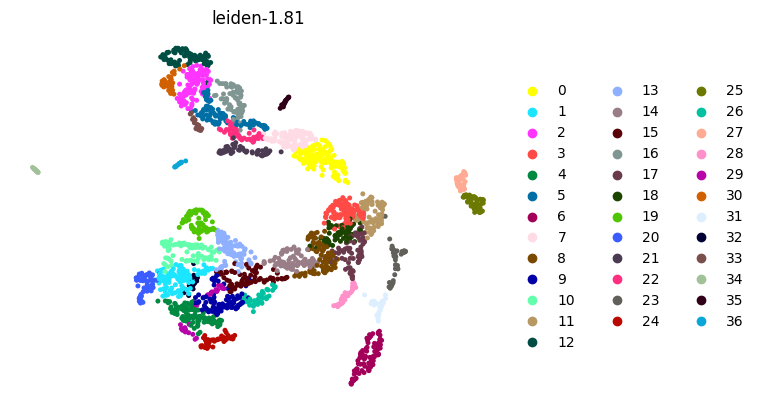

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


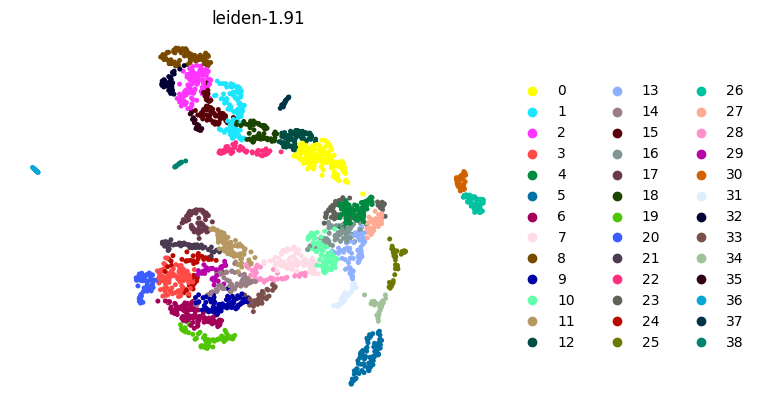

In [33]:
for i in leidenTotal:
   sc.pl.umap(adata_as, color=i, frameon=False) 

In [34]:
dedf={}
for lei in leidenTotal:
    dedf[lei]={}
    sc.tl.rank_genes_groups(adata_as, groupby=lei, method='wilcoxon', key_added = "wilcoxon_"+lei)
    for cl in adata_as.obs[lei].unique():
        dedf[lei][cl] = sc.get.rank_genes_groups_df(adata_as, group=cl, key ='wilcoxon_'+lei)

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning

In [35]:
directory_root = "/home/marta.sallese/ov_cancer_atlas/atlas_project/script/downstream/clustering/immune/ascites/"

errorDic={}
log_file = directory_root + 'ascites.log'

# Check if the log exists
if os.path.isfile(log_file):
# If it doesn't exist, create it
    os.remove(log_file)

logging.basicConfig(filename=log_file, level=logging.INFO) 
                    # format='%(ascites)s %(levelname)s %(name)s %(message)s')
logger=logging.getLogger(__name__)

for lei in leidenTotal:
    errorDic[lei]={}
    directory = directory_root + lei
    # Check if the directory exists
    if not os.path.exists(directory):
        # If it doesn't exist, create it
        os.makedirs(directory)
    else:
        shutil.rmtree(directory)
        os.makedirs(directory)
    for cl in adata_as.obs[lei].unique():
        dedf[lei][cl] = sc.get.rank_genes_groups_df(adata_as, group=cl, key ='wilcoxon_'+lei)
        dedf[lei][cl].to_csv(directory + '/rank_gene_groups_df_' + cl + '.csv')
        try:
            # print(dedf[lei][cl])
            threshold1 = dedf[lei][cl].dropna(axis='rows')
            threshold2 = threshold1.loc[(threshold1['logfoldchanges'] > 1) & (threshold1['logfoldchanges'] < 100), :]
            threshold3 = threshold2.loc[threshold2['scores'] > 5, :]
            threshold4 = threshold3.loc[threshold3['pvals_adj'] < 0.05, :]
            # break
            print('{}_{}_{}_{}'.format(lei, cl, threshold4.shape[0], threshold4.scores.min()))
            # ontologia di (dedf[lei][cl])
            gp = GProfiler(return_dataframe=True)
            query = threshold4.names.to_list()
            ontology = gp.profile(organism='hsapiens', 
                                    query=query, 
                                    no_evidences=False, 
                                    background=adata_as.var_names.to_list(),
                                    sources=['GO:CC', 'GO:BP', 'GO:MF','REAC','KEGG'])
            ontology.to_csv(directory + '/gprofiler_' + cl + '.csv')
            if ontology.shape[0] > 0:
                plot_enrich(ontology, filename=directory + '/ontology_' + cl + '.png')
            else:
                logger.info('leiden {} cluster {}'.format(lei, cl))
                logger.info('ontology empty')
            
            
            errorDic[lei][cl]={}

        except Exception as e:
            errorDic[lei][cl]=e
            # with open(directory + '/ontology_' + cl + '.log', 'w') as f:
            #     f.write('error')
            logger.info('leiden {} cluster {}'.format(lei, cl))
            logger.error(e)
            continue

logging.shutdown()


leiden-0.01_0_1723_5.270110130310059
leiden-0.01_1_2542_5.192056179046631
leiden-0.01_2_5784_5.000374794006348
leiden-0.01_3_2651_5.000858306884766
leiden-0.01_4_3680_5.000711917877197
leiden-0.11_0_10951_5.032580375671387
leiden-0.11_2_8259_5.004883289337158
leiden-0.11_4_1852_5.0775628089904785
leiden-0.11_5_2651_5.000858306884766
leiden-0.11_6_3680_5.000711917877197
leiden-0.11_1_131_5.040685176849365
leiden-0.11_3_187_5.028704643249512
leiden-0.21_3_9523_5.008904933929443
leiden-0.21_1_8717_5.059865951538086
leiden-0.21_4_3510_5.004820346832275
leiden-0.21_7_5784_5.000374794006348
leiden-0.21_8_2651_5.000858306884766
leiden-0.21_11_3680_5.000711917877197
leiden-0.21_6_302_5.006144046783447
leiden-0.21_2_11613_5.011354446411133
leiden-0.21_9_1789_5.003300189971924
leiden-0.21_0_103_5.044558525085449
leiden-0.21_5_175_5.1069111824035645
leiden-0.21_10_608_5.003482818603516
leiden-0.31_1_9357_5.062488079071045
leiden-0.31_2_10577_5.017301559448242
leiden-0.31_7_9244_5.001754283905029


In [36]:
logging.shutdown()

In [37]:
adata_as.write_h5ad('/group/testa/Project/OvarianAtlas/atlas_project/raw_data/downstream/clustering/immune/adata_ascites_embeddings.h5ad')